# 1. READ DATA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas_profiling
%matplotlib inline

In [3]:
train = pd.read_csv('./data/train.csv',index_col=0)
test = pd. read_csv('./data/test.csv',index_col=0)

In [ ]:
# pr=test.profile_report()
# pr.to_file('./pr_report.html') # pr_report.html 파일로 저장

In [ ]:
train.head()

- type
- fiberID  
- psfMag_u
- psfMag_g
- psfMag_r
- psfMag_i
- psfMag_z  
- modelMag_u
- modelMag_g
- modelMag_r
- modelMag_i
- modelMag_z


# 2. Check Parameters
- 1. Check Missing and Null Data
- 2. Check mean, min, max
- 3. Check correlation between columns
- 4. Check type(label)
- 5. Check Each Columns 
- 6. Check between type(label) and columns 

1. Check Null Data

In [ ]:
train.info()

2. Describe

In [ ]:
train.describe()

3. Correlation

In [ ]:
corr = train.corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(corr, cmap=cmap, annot=True, fmt = ".2f")

4. Check type(label data)  
Imbalnced category

In [ ]:
train['type'].value_counts()

In [ ]:
fig = plt.figure(figsize=(8,9))
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((3,3), (0,0), colspan = 3)
train['type'].value_counts().plot(kind='bar')
plt.title('type Values in the Training Set - train ()')

In [ ]:
fig, ax = plt.subplots(dpi=100)
train['type'].value_counts(ascending=True).plot(kind='barh', width=0.8, edgecolor='black', ax=ax)
ax.grid(axis='x', linestyle='--')
fig.tight_layout()
plt.show()

### Check Each Columns

In [ ]:
col = train.columns
fig, axes = plt.subplots(10, 2, figsize=(10,30))

for i, column in enumerate(col):    
    if i>1:
        sns.kdeplot(train[column], shade=True, ax=axes.flat[i-2])
        
fig.tight_layout()
plt.show()

In [ ]:
cols= train.columns
cols[2:7]

In [ ]:
# sns.pairplot(train[cols])

6. Check type and other columns Connection

KeyError: "None of [Index([(21.431953406254802, 20.708103988199, 16.7278979265844, 20.040370991681, 23.0587673158623, 19.315941586511702, 21.1209194437774, 15.786267718713699, 20.773063631318, 18.3154596918432, 17.228673684456002, 18.6838716636346, 19.785866304297198, 19.1126554452698, 19.0041511728707, 20.8209520543145, 19.6764816276324, 19.9260069891469, 20.5688085839457, 20.1921143486524, 15.989207598450598, 17.841138160649606, 18.895626610234306, 20.2660443021486, 18.674142330754, 18.8515290889257, 22.5374945662953, 20.0748312789278, 19.2170514328713, 21.1879751757245, 21.126963413288397, 19.720593842469896, 18.798606106058397, 21.2295535074383, 19.934723761212002, 20.887840303067602, 19.2212180221559, 21.556742336163996, 19.5323030332274, 17.0150601451299, 20.0239300650379, 21.6074235527179, 18.9968105447192, 20.0889901064041, 19.418428235058, 17.4263728850463, 18.907372189125198, 17.3771859924964, 25.555191021824303, 17.681626047431, 19.9188956912731, 21.125461904873603, 21.3412277532092, 21.1791234539437, 16.7192538395433, 24.5138204891914, 20.576785234541603, 18.4574319377458, 19.1837198510411, 16.3991791540524, 19.7374938529446, 21.835875208065602, 16.8454536940386, 19.931198454222, 18.7712866597431, 19.3950770399641, 20.6277303780242, 18.2793252237557, 19.8586078104376, 20.4065332123972, 17.141493983363098, 15.1149395204547, 21.753255044317694, 19.839486946974002, 21.854108793207, 18.4932809176368, 21.5386981425031, 19.0070040104215, 18.341995626514606, 18.0277388368036, 19.0204935658772, 19.0614112938127, 19.3540906813677, 20.209430467462106, 20.7389612496337, 19.9386576011797, 20.376307900230106, 20.1949011048248, 16.6930339284831, 21.931282790226003, 18.5447202347345, 19.6380666733155, 19.8766835687218, 19.371652648770002, 19.355624528143, 19.6285607488207, 20.7180003238558, 17.666726306593898, 21.223893112362894, 21.786027784717497, ...)], dtype='object')] are in the [columns]"

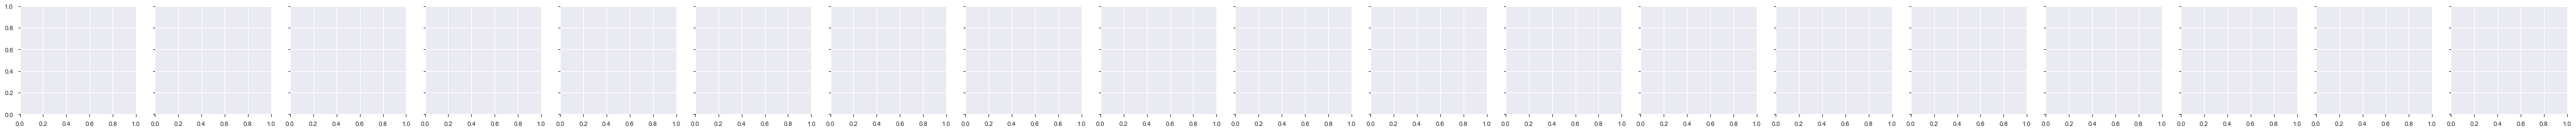

In [14]:
g = sns.FacetGrid(train, col='type')
g.map(plt.hist, train['psfMag_g'], bins=20)

In [ ]:
fig, axes = plt.subplots(5, 1, figsize=(10,30))
columns = train.filter(regex='psf').columns.tolist()[:5]
for i, column in enumerate(columns):
    sns.boxplot(y='type', x=column, data=train, ax=axes.flat[i])
    axes.flat[i].grid(axis='x', linestyle='--')
    axes.flat[i].set_xlim([-20,50])
    
fig.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(5, 1, figsize=(10,30))
columns = train.filter(regex='fiberMag').columns.tolist()[:5]
for i, column in enumerate(columns):
    sns.boxplot(y='type', x=column, data=train, ax=axes.flat[i])
    axes.flat[i].grid(axis='x', linestyle='--')
    axes.flat[i].set_xlim([-20,50])
    
fig.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(5, 1, figsize=(10,30))
columns = train.filter(regex='petro').columns.tolist()[:5]
for i, column in enumerate(columns):
    sns.boxplot(y='type', x=column, data=train, ax=axes.flat[i])
    axes.flat[i].grid(axis='x', linestyle='--')
    axes.flat[i].set_xlim([-20,50])
    
fig.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(5, 1, figsize=(10,30))
columns = train.filter(regex='model').columns.tolist()[:5]
for i, column in enumerate(columns):
    sns.boxplot(y='type', x=column, data=train, ax=axes.flat[i])
    axes.flat[i].grid(axis='x', linestyle='--')
    axes.flat[i].set_xlim([-20,50])
    
fig.tight_layout()
plt.show()

### Outlier Check and Plot

In [ ]:
def draw_types(n=6, regex='psf'):
    labels = train['type'].value_counts().index.tolist()[:n]
    columns = train.filter(regex=regex).columns.tolist()
    colors = ['violet', 'green', 'red', 'cyan', 'yellow']
    waves = [column[-1:] for column in columns]

    fig, axes = plt.subplots(int(n/2), 2, figsize=(10,n), dpi=100)
    w = 1.5
    for i, label in enumerate(labels):
        for column, color, wave in zip(columns, colors, waves):
            q1 = train.loc[train['type'] == label, column].quantile(0.25)
            q3 = train.loc[train['type'] == label, column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - (w * iqr)
            upper_bound = q3 + (w * iqr)
            
            mask = (train.loc[train['type']==label, column] >= lower_bound) & (train.loc[train['type']==label, column] <= upper_bound)
            
            data = train.loc[train['type'] == label, column].loc[mask]

            sns.distplot(data, hist=False, color=color, kde_kws={'shade': True}, 
                         label=wave, ax=axes.flat[i])

        axes.flat[i].set_title(label)
        axes.flat[i].set_xlabel('')
        axes.flat[i].grid(axis='x', linestyle='--')
        axes.flat[i].legend(frameon=True, framealpha=1, shadow=False, 
                            fancybox=False, edgecolor='black')

    fig.tight_layout()
    plt.show()

In [ ]:
draw_types(n=20, regex='psf')

In [ ]:
draw_types(n=20, regex='fiberMag')

In [ ]:
draw_types(n=20, regex='modelMag')

In [ ]:
draw_types(n=20, regex='petro')

## 3. Feature Engineering

### 3.1 Numerical values
### 3.2 Categorical values
### 3.3 Filling Missing Values
### 3.4 Detect Outlier and Remove
### 3.5 Feature engineering

In [ ]:
id1=train['psfMag_u']<-10
id2=train['psfMag_u']>40.
train2 = train.copy()
train2['psfMag_u'][id1]=-10.
train2['psfMag_u'][id2]=40.